# Exercício 4
Utilizando o dataset Heart Disease UCI (disponível em https://www.kaggle.com/ronitf/heart-disease-uci) construa
uma arvore de decisão que classifique as amostras em saudáveis ou não (coluna target =0).

Avalie a precisão, acurácia e mostre a arvore de decisão gerada.

### 1 - Vamos importar algumas bibliotecas que iremos utilizar nesse exercício

In [1]:
import pandas as pd
import seaborn as sb

from pandas import Series, DataFrame
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

### 2 - Vamos ler o conjunto de dados utilizando a função read_csv() do pacote Pandas

In [2]:
heart = pd.read_csv('heart.csv', sep=',')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 3 - Análise do dataset

Como estamos construindo um modelo para prever o grau de risco cardíaco de cada paciente, nosso alvo será a variável "Target" do dataframe heart.

Para ter certeza de que é uma variável binária, vamos usar a função countplot () do Seaborn.

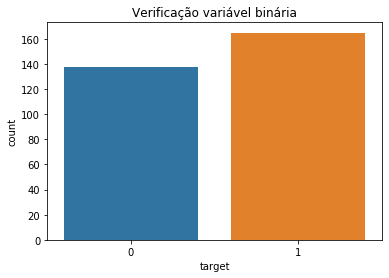

In [3]:
plot = sb.countplot(x='target', data=heart)
plt.title('Verificação variável binária')
plt.show(plot)

Agora vamos verificar se existem valores faltantes

In [4]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Vamos validar a independência entre as variáveis

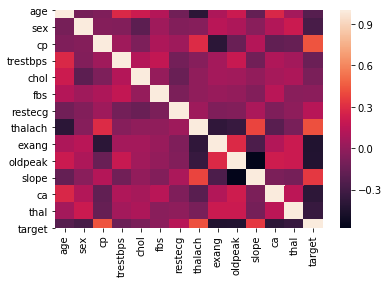

In [6]:
sb.heatmap(heart.corr())

### 4 - Modelo de Classificação Decision Tree

Separar a variável resposta das variáveis de treinamento

In [7]:
X = heart.iloc[:,0:-1].values
y = heart.iloc[:,-1].values

print(X)
print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


Normalização do dataset

In [8]:
XNew = StandardScaler().fit_transform(X)
XOld = X
X = XNew

print(XOld)
print(X)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


Dividir os dados em treino e teste (teste = 30%)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 15)

Classif_tree = DecisionTreeClassifier()
Classif_tree.fit(X_train, y_train)
y_pred = Classif_tree.predict(X_test)

In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[25 13]
 [12 41]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        38
           1       0.76      0.77      0.77        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91

0.7252747252747253


Plot da árvore

[Text(183.6402985074627, 208.38, 'thal <= 0.305\ngini = 0.498\nsamples = 212\nvalue = [100, 112]\nclass = Doente'),
 Text(102.43880597014926, 190.26, 'ca <= -0.225\ngini = 0.39\nsamples = 132\nvalue = [35, 97]\nclass = Doente'),
 Text(74.95522388059702, 172.14, 'trestbps <= 2.02\ngini = 0.221\nsamples = 87\nvalue = [11, 76]\nclass = Doente'),
 Text(64.96119402985074, 154.01999999999998, 'oldpeak <= 2.166\ngini = 0.189\nsamples = 85\nvalue = [9, 76]\nclass = Doente'),
 Text(54.96716417910448, 135.89999999999998, 'thalach <= -2.893\ngini = 0.172\nsamples = 84\nvalue = [8, 76]\nclass = Doente'),
 Text(44.97313432835821, 117.77999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Saudável'),
 Text(64.96119402985074, 117.77999999999999, 'thalach <= 0.496\ngini = 0.154\nsamples = 83\nvalue = [7, 76]\nclass = Doente'),
 Text(39.97611940298508, 99.66, 'trestbps <= -0.15\ngini = 0.26\nsamples = 39\nvalue = [6, 33]\nclass = Doente'),
 Text(19.98805970149254, 81.53999999999999, 'thalach

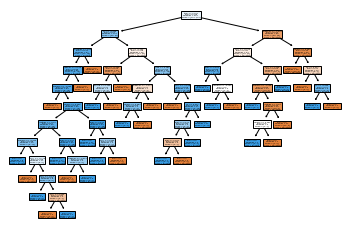

In [11]:
plot_tree(Classif_tree, filled=True, feature_names=heart.columns.values[0:-1], class_names=['Saudável', 'Doente'])

Vamos descobrir os maiores valores de acurácia variando a quantidade de folhas da árvore

In [14]:
leaf_range = range(2, 20)
scores = []

for i in leaf_range:
    Classif_tree = DecisionTreeClassifier(max_leaf_nodes=i)
    Classif_tree.fit(X_train, y_train)
    y_pred = Classif_tree.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7032967032967034, 0.7362637362637363, 0.7802197802197802, 0.7802197802197802, 0.7912087912087912, 0.7802197802197802, 0.7582417582417582, 0.7582417582417582, 0.7582417582417582, 0.7472527472527473, 0.7472527472527473, 0.7582417582417582, 0.7912087912087912, 0.7582417582417582, 0.7582417582417582, 0.7912087912087912, 0.7472527472527473, 0.7582417582417582]


Plot dos valores de acurácia em função da quantidade de folhas

Text(0, 0.5, 'Acurácia')

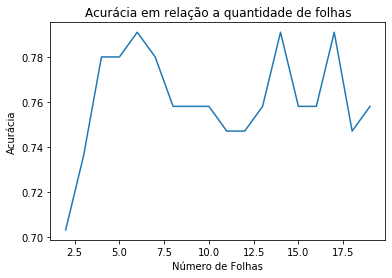

In [15]:
plt.plot(leaf_range, scores)
plt.title('Acurácia em relação a quantidade de folhas')
plt.xlabel('Número de Folhas')
plt.ylabel('Acurácia')

In [16]:
Classif_tree = DecisionTreeClassifier(max_leaf_nodes=6)
Classif_tree.fit(X_train, y_train)
y_pred = Classif_tree.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[28 10]
 [ 9 44]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           1       0.81      0.83      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.79      0.79        91

0.7912087912087912


Vamos plotar a árvore gerada

[Text(167.40000000000003, 190.26, 'thal <= 0.305\ngini = 0.498\nsamples = 212\nvalue = [100, 112]\nclass = Doente'),
 Text(66.96000000000001, 135.9, 'ca <= -0.225\ngini = 0.39\nsamples = 132\nvalue = [35, 97]\nclass = Doente'),
 Text(33.480000000000004, 81.53999999999999, 'gini = 0.221\nsamples = 87\nvalue = [11, 76]\nclass = Doente'),
 Text(100.44000000000001, 81.53999999999999, 'cp <= -0.453\ngini = 0.498\nsamples = 45\nvalue = [24, 21]\nclass = Saudável'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.255\nsamples = 20\nvalue = [17, 3]\nclass = Saudável'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.403\nsamples = 25\nvalue = [7, 18]\nclass = Doente'),
 Text(267.84000000000003, 135.9, 'oldpeak <= -0.293\ngini = 0.305\nsamples = 80\nvalue = [65, 15]\nclass = Saudável'),
 Text(234.36, 81.53999999999999, 'chol <= -0.353\ngini = 0.497\nsamples = 24\nvalue = [13, 11]\nclass = Saudável'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.219\nsamples = 8\nvalue 

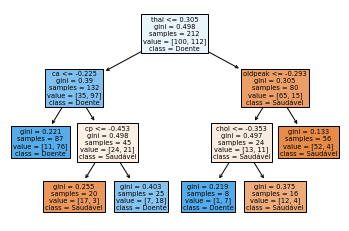

In [18]:
plot_tree(Classif_tree, filled=True, feature_names=heart.columns.values[0:-1], class_names=['Saudável', 'Doente'])

### Podemos verificar no gráfico, que a maior acurácia (79%) é obtida com 6,14 e 17 folhas. Escolheremos nossa árvore com 6 folhas para atender o que nos foi solicitado no exercício: "...gerar a menor arvore possível com a maior taxa de acerto (podando a quantidade máxima de folhas e/ou altura da arvore).